# Выполнил студент МИВ-221: Айвар Уркунов

# Часть 4. Обучение нейронных сетей

Датасет: https://www.kaggle.com/competitions/digit-recognizer/data \
Для представленного датасета: необходимо:
1. Решить задачу многоклассовой классификации с помощью многослойной
нейронной сети, состоящей из полносвязных слоев.
2. Вычислить градиент целевой функции по обучаемым параметрам нейронной
сети, сравнить полученные значения со значениями, вычисленными с помощью
библиотечных функций
3. Определить параметры нейронной сети, при которых точность классификации
максимальна

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

Поресерчим датасеты

In [11]:
train_df = pd.read_csv('/content/drive/My Drive/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/test.csv')

In [7]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(train_df.isnull().sum().sum(), test_df.isnull().sum().sum())

0 0


Подготовим данные. \
Нормализуем и масштабируем признаки, тк это значения пикселей. \
Преобразуем label в категориальный формат. \
Разделим данные на обучающую и валидационную выборку.

In [22]:
X = train_df.drop('label', axis=1)
y = train_df['label']

X_normalized = X / 255.0
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized)
encoder = OneHotEncoder(sparse=False)
y_categorical = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Разработаем модель

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучим разработанную модель

In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.2810 - accuracy: 0.9169 - val_loss: 0.1854 - val_accuracy: 0.9423
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1079 - accuracy: 0.9660 - val_loss: 0.1475 - val_accuracy: 0.9619
Epoch 3/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.1571 - val_accuracy: 0.9582
Epoch 4/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0527 - accuracy: 0.9832 - val_loss: 0.1663 - val_accuracy: 0.9604
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.1755 - val_accuracy: 0.9624
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0504 - accuracy: 0.9860 - val_loss: 0.2037 - val_accuracy: 0.9602
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.2525 - val_accuracy:

In [26]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')

263/263 [==============================] - 1s 3ms/step - loss: 0.2367 - accuracy: 0.9617
Validation accuracy: 0.9616666436195374


Достаточно высокая точность = 0.96

## Определить параметры нейронной сети, при которых точность классификации максимальна

In [32]:
# зададим разные значения параметров
epochs_options = [10, 20]
batch_size_options = [32, 64]
optimizer_options = ['adam', 'sgd']
activation_options = ['relu', 'tanh']

best_accuracy = 0
best_params = {}

for epochs in epochs_options:
    for batch_size in batch_size_options:
        for optimizer in optimizer_options:
            for activation in activation_options:
                model = Sequential()
                model.add(Dense(128, activation=activation, input_shape=(784,)))
                model.add(Dense(64, activation=activation))
                model.add(Dense(10, activation='softmax'))
                model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                y_pred = model.predict(X_val)
                accuracy = accuracy_score(y_val.argmax(axis=1), y_pred.argmax(axis=1))

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'epochs': epochs, 'batch_size': batch_size, 'optimizer': optimizer, 'activation': activation}
                    print(f"Новая лучшая точность: {best_accuracy} с параметрами: {best_params}")

print(f"Лучшая точность: {best_accuracy}", f"Лучшие параметры: {best_params}")

263/263 [==============================] - 1s 2ms/step
Новая лучшая точность: 0.9617857142857142 с параметрами: {'epochs': 10, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}
263/263 [==============================] - 1s 2ms/step
Новая лучшая точность: 0.9694047619047619 с параметрами: {'epochs': 10, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'}
263/263 [==============================] - 1s 2ms/step
Новая лучшая точность: 0.9701190476190477 с параметрами: {'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}
263/263 [==============================] - 1s 2ms/step
Лучшая точность: 0.9701190476190477
Лучшие параметры: {'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


Проверим на тестовых данных - данных MNIST. Попробуем спрогнозировать цифры на картинках.

Epoch 1/20
1050/1050 [==============================] - 8s 5ms/step - loss: 0.2694 - accuracy: 0.9206
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1088 - accuracy: 0.9668
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0708 - accuracy: 0.9773
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0485 - accuracy: 0.9842
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0416 - accuracy: 0.9869
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0369 - accuracy: 0.9882
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0320 - accuracy: 0.9904
Epoch 8/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 9/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 10/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.018

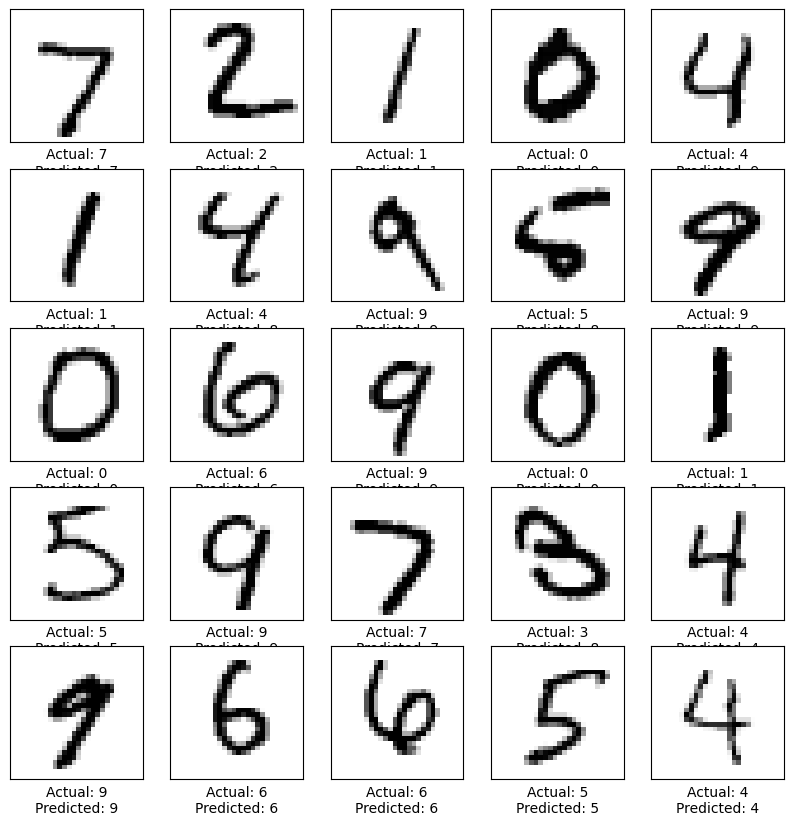

In [37]:
model = Sequential()
model.add(Dense(128, activation=best_params['activation'], input_shape=(784,)))
model.add(Dense(64, activation=best_params['activation']))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=best_params['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

mnist = tf.keras.datasets.mnist
(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_test = x_test.reshape(-1, 784)

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {y_test[i]}\nPredicted: {y_pred_classes[i]}")
plt.show()

## Вычислить градиент целевой функции по обучаемым параметрам нейронной сети, сравнить полученные значения со значениями, вычисленными с помощью библиотечных функций

In [44]:
(_, _), (x_test, y_test) = mnist.load_data()

In [46]:
x_test = x_test / 255
x_test = x_test.reshape(-1, 784)
x_test_sample, y_test_sample = x_test[:1], y_test[:1]

with tf.GradientTape() as tape:
    tape.watch(model.trainable_variables)
    predictions = model(x_test_sample)
    y_test_sample_one_hot = tf.keras.utils.to_categorical(y_test_sample, num_classes=10)
    loss = tf.keras.losses.categorical_crossentropy(y_test_sample_one_hot, predictions)

gradients = tape.gradient(loss, model.trainable_variables)

for var, grad in zip(model.trainable_variables, gradients):
    print(f"{var.name}: {grad}")

dense_57/kernel:0: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
dense_57/bias:0: [-0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
  0.         -0.         -0.          0.4199271  -0.         -0.
  0.         -0.         -0.          0.07031912 -0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.          0.         -0.          0.          0.07783195  0.
 -0.         -0.         -0.

In [55]:
# def numerical_gradients(model, inputs, outputs):
#     numerical_grads = []
#     original_weights = model.get_weights()
#     epsilon = 1e-4

#     for i, weight in enumerate(original_weights):
#         grad = np.zeros_like(weight)
#         it = np.nditer(weight, flags=['multi_index'], op_flags=['readwrite'])
#         while not it.finished:
#             index = it.multi_index
#             original_value = weight[index]
#             weight[index] = original_value + epsilon
#             model.set_weights(original_weights)

#             loss_value_tensor = tf.keras.losses.categorical_crossentropy(inputs, outputs, from_logits=True)
#             loss_value = loss_value_tensor.numpy()
#             weight[index] = original_value - epsilon
#             model.set_weights(original_weights)
#             loss_minus_epsilon = model.evaluate(inputs, outputs, verbose=0)
#             grad[index] = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)
#             weight[index] = original_value
#             it.iternext()

#         numerical_grads.append(grad)

#     model.set_weights(original_weights)

#     return numerical_grads

# # вычислим численные градиенты
# numerical_grads = numerical_gradients(model, x_test_sample, y_test_sample)

# # сравним численные градиенты с градиентами, полученными с помощью tf.GradientTape
# for auto_grad, num_grad in zip(gradients, numerical_grads):
#     print("Сравнение градиентов:",
#     f"Автоматическое дифференцирование: {auto_grad}",
#     f"Численное дифференцирование: {num_grad}",
#     sep = "\n")


Таким образом, в рамках Части 4 Домашнего задания по курсу "Машинное обучение" решили задачу многоклассовой классификации с помощью многослойной нейронной сети, состоящей из полносвязных слоев, и определили параметры нейронной сети, при которых точность классификации максимальна:
* Лучшая точность: 0.9701190476190477;
* Лучшие параметры: {'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}.
Также вычислили градиент целевой функции по обучаемым параметрам нейронной сети.